In [2]:
import numpy as np
import pandas as pd

In [ ]:
df

,"{""username"":""ayush07120""","key:""9cefa20a75779d214fde816595cc723f""}"


In [3]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ayush07120","key":"5c03b1ab499c7f25db0448e1969ee7e8"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats --force


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:07<00:00, 139MB/s]
100% 1.06G/1.06G [00:07<00:00, 157MB/s]


In [8]:
!unzip -q dogs-vs-cats.zip -d dogs_vs_cats


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [8]:
# ek sath sare data pe kam karna is not possible
# due to large data, and we have not that much storage

# so we use Generators---> for creating batch of our data

In [10]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(256,256) # resize the size becouse har image ka size diffirent hai
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# each image store as numpy array
# but the size of array is 0 to 255
# so we want to normalize it

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

# Building model

In [12]:
model = Sequential()

In [31]:
model.add(Conv2D(32,activation='relu',kernel_size=(3,3),padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:

history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.6261 - loss: 0.6716 - val_accuracy: 0.7498 - val_loss: 0.5127
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7789 - loss: 0.4706 - val_accuracy: 0.7830 - val_loss: 0.4630
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 75ms/step - accuracy: 0.8277 - loss: 0.3743 - val_accuracy: 0.7948 - val_loss: 0.4790
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8971 - loss: 0.2412 - val_accuracy: 0.8012 - val_loss: 0.5910
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9463 - loss: 0.1385 - val_accuracy: 0.7930 - val_loss: 0.7385


In [16]:
import matplotlib.pyplot as plt

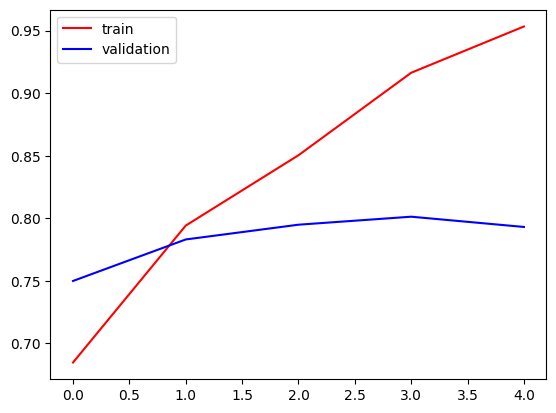

In [36]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

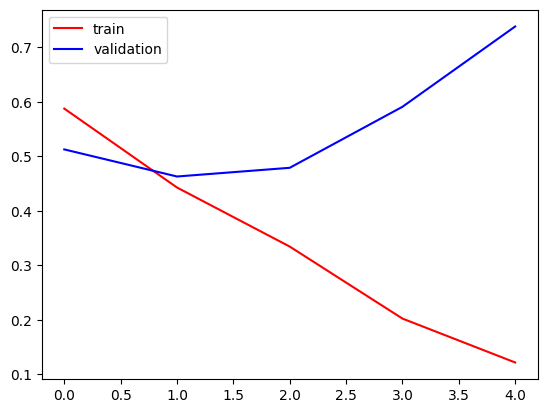

In [37]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()

before normalaization

In [13]:
model.add(Conv2D(32,activation='relu',kernel_size=(3,3),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history2 = model.fit(train_ds,epochs=5,validation_data=validation_ds)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.5928 - loss: 2.5044 - val_accuracy: 0.6436 - val_loss: 0.6531
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.7036 - loss: 0.5777 - val_accuracy: 0.7308 - val_loss: 0.5610
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7830 - loss: 0.4591 - val_accuracy: 0.7126 - val_loss: 0.6727
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8190 - loss: 0.3953 - val_accuracy: 0.7806 - val_loss: 0.5308
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8551 - loss: 0.3301 - val_accuracy: 0.7476 - val_loss: 0.5969


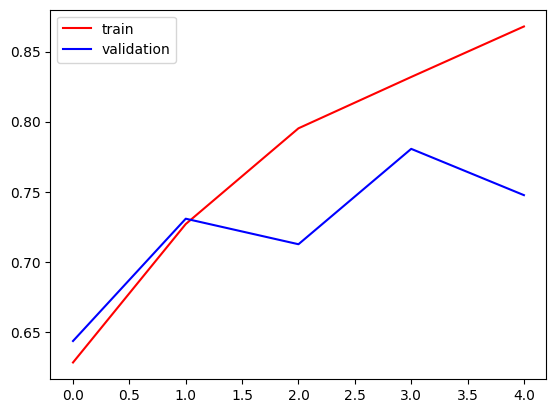

In [17]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()

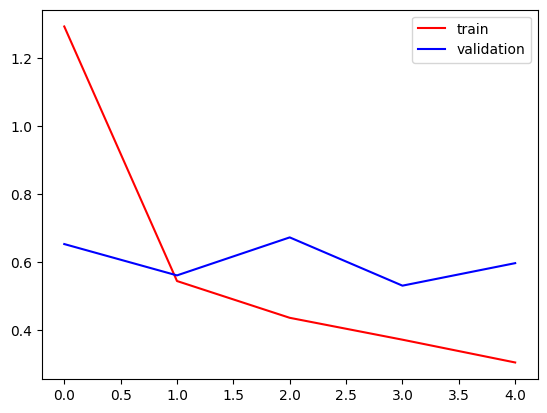

In [18]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()

# testing new data

In [19]:
import cv2

In [27]:
test_img = cv2.imread('/content/images dog.jpeg')

array([[[ 60,  94, 118],
        [ 60,  94, 118],
        [ 61,  95, 119],
        ...,
        [ 37,  63,  77],
        [ 37,  63,  77],
        [ 37,  63,  77]],

       [[ 60,  94, 118],
        [ 60,  94, 118],
        [ 61,  95, 119],
        ...,
        [ 37,  63,  77],
        [ 37,  63,  77],
        [ 37,  63,  77]],

       [[ 60,  94, 118],
        [ 60,  94, 118],
        [ 61,  95, 119],
        ...,
        [ 36,  62,  76],
        [ 36,  62,  76],
        [ 36,  62,  76]],

       ...,

       [[ 50, 131, 104],
        [ 50, 131, 104],
        [ 51, 130, 103],
        ...,
        [ 61, 128, 107],
        [ 63, 130, 109],
        [ 66, 132, 113]],

       [[ 50, 131, 104],
        [ 52, 133, 106],
        [ 49, 128, 101],
        ...,
        [ 59, 126, 105],
        [ 61, 128, 107],
        [ 64, 130, 111]],

       [[ 47, 128, 101],
        [ 50, 131, 104],
        [ 47, 126,  99],
        ...,
        [ 57, 124, 103],
        [ 59, 126, 105],
        [ 62, 128, 109]]], dtype=uint8)
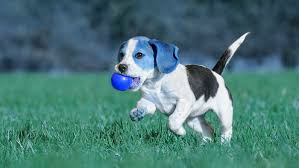

In [28]:
test_img

In [29]:
test_img.shape

(168, 299, 3)

In [30]:
test_img = cv2.resize(test_img, (256,256))

test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[1.]], dtype=float32)

In [ ]:
# 1 = dog
# 0 = cat